In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from sklearn.linear_model import LinearRegression
import numpy as np
plt.style.use('seaborn')

In [3]:
df = pd.read_stata('WoON2015small.dta')

C:\Users\jabor\AppData\Roaming\Python\Python38\site-packages\pandas\io\stata.py:1433: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


In [4]:
city_grp = df.groupby(['g4_5'])

In [26]:
df_1=df[['WOZwaarde', 'AantKind', 'gslop', 'LftOP', 'Kamer5', 'huko', 'g4_5']]
df_1

WOZwaarde  AantKind  gslop  LftOP      Kamer5            huko  \
0        189000       0.0    Man     20         NaN          Rental   
1        783000       0.0    Man     21   6+ kamers          Rental   
2        206000       0.0  Vrouw     27  1-2 kamers          Rental   
3        324000       1.0  Vrouw     57   6+ kamers  Owner-Occupied   
4        215000       0.0  Vrouw     70    3 kamers  Owner-Occupied   
...         ...       ...    ...    ...         ...             ...   
7784      66000       2.0  Vrouw     42    4 kamers          Rental   
7785     106000       0.0    Man     79    3 kamers          Rental   
7786      90000       0.0  Vrouw     72    3 kamers          Rental   
7787      81000       0.0  Vrouw     22    4 kamers          Rental   
7788     126000       0.0    Man     27    4 kamers          Rental   

              g4_5  
0        Amsterdam  
1          Utrecht  
2          Utrecht  
3          Utrecht  
4          Utrecht  
...            ...  
7784  s-Gravenhage  
7785  s-Gravenhage  
7786  s-Gravenhage  
7787  s-Gravenhage  
7788  s-Gravenhage  

[7789 rows x 7 columns]

In [28]:
df_1['AantKind'].fillna(value=0, inplace=True)

C:\Users\jabor\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [29]:
bins = [0, 30, 65, 120]
labels = ['0-29', '30-64', '65+']
df_1['AgeCat']=pd.cut(df_1['LftOP'], bins, labels = labels, include_lowest=True)
df_1['AgeCat'].value_counts()

<ipython-input-29-4f3c735f0afe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['AgeCat']=pd.cut(df_1['LftOP'], bins, labels = labels, include_lowest=True)


30-64    4273
0-29     2208
65+      1308
Name: AgeCat, dtype: int64

In [30]:
df_1_grp = df_1.groupby(['g4_5'])
df_1_grp

In [31]:
df_1Kamercounts = df_1['Kamer5'].value_counts()
df_1Kamercounts

3 kamers      2319
4 kamers      1793
1-2 kamers    1424
5 kamers       900
6+ kamers      637
Name: Kamer5, dtype: int64

In [32]:
df_1_grp.head()

WOZwaarde  AantKind  gslop  LftOP      Kamer5            huko  \
0       189000       0.0    Man     20         NaN          Rental   
1       783000       0.0    Man     21   6+ kamers          Rental   
2       206000       0.0  Vrouw     27  1-2 kamers          Rental   
3       324000       1.0  Vrouw     57   6+ kamers  Owner-Occupied   
4       215000       0.0  Vrouw     70    3 kamers  Owner-Occupied   
5       424000       0.0    Man     50   6+ kamers  Owner-Occupied   
134     130000       0.0    Man     28         NaN             NaN   
135     128000       0.0  Vrouw     57  1-2 kamers          Rental   
136     284500       0.0    Man     70    3 kamers          Rental   
137     217000       0.0  Vrouw     76    3 kamers          Rental   
461     561000       0.0  Vrouw     80   6+ kamers  Owner-Occupied   
462     145000       2.0    Man     49    4 kamers  Owner-Occupied   
463     275000       0.0  Vrouw     54    4 kamers  Owner-Occupied   
464     351000       0.0  Vrouw     69   6+ kamers  Owner-Occupied   
465     177000       2.0  Vrouw     39    5 kamers  Owner-Occupied   
627     160000       2.0  Vrouw     49    5 kamers  Owner-Occupied   
628     122000       0.0  Vrouw     55    3 kamers          Rental   
629     142000       2.0  Vrouw     32    4 kamers  Owner-Occupied   
630     181000       0.0  Vrouw     30   6+ kamers  Owner-Occupied   
631     181000       0.0    Man     49    4 kamers          Rental   

             g4_5 AgeCat  
0       Amsterdam   0-29  
1         Utrecht   0-29  
2         Utrecht   0-29  
3         Utrecht  30-64  
4         Utrecht    65+  
5         Utrecht  30-64  
134     Amsterdam   0-29  
135     Amsterdam  30-64  
136     Amsterdam    65+  
137     Amsterdam    65+  
461  s-Gravenhage    65+  
462  s-Gravenhage  30-64  
463  s-Gravenhage  30-64  
464  s-Gravenhage    65+  
465  s-Gravenhage  30-64  
627     Rotterdam  30-64  
628     Rotterdam  30-64  
629     Rotterdam  30-64  
630     Rotterdam   0-29  
631     Rotterdam  30-64

In [33]:
df_1_grp.dtypes

WOZwaarde AantKind     gslop  LftOP    Kamer5      huko    AgeCat
g4_5                                                                          
Amsterdam        int32  float64  category  int16  category  category  category
s-Gravenhage     int32  float64  category  int16  category  category  category
Rotterdam        int32  float64  category  int16  category  category  category
Utrecht          int32  float64  category  int16  category  category  category

In [34]:
linear_regressor = LinearRegression()
dfsample1=df_1.sample(frac=0.1)
dfsample2=df_1.sample(frac=0.1)
dfsample3=df_1.sample(frac=0.1)
dfsample4=df_1.sample(frac=0.1)
X1 = dfsample1['WOZwaarde'].values.reshape(-1, 1)
Y1 = dfsample1['LftOP'].values.reshape(-1, 1)
X2 = dfsample2['WOZwaarde'].values.reshape(-1, 1)
Y2 = dfsample2['LftOP'].values.reshape(-1, 1)
X3 = dfsample3['WOZwaarde'].values.reshape(-1, 1)
Y3 = dfsample3['LftOP'].values.reshape(-1, 1)
X4 = dfsample4['WOZwaarde'].values.reshape(-1, 1)
Y4 = dfsample4['LftOP'].values.reshape(-1, 1)
linear_regressor.fit(X1, Y1)
linear_regressor.fit(X2, Y2)
linear_regressor.fit(X3, Y3)
linear_regressor.fit(X4, Y4)
Y1_pred = linear_regressor.predict(X1)
Y2_pred = linear_regressor.predict(X2)
Y3_pred = linear_regressor.predict(X3)
Y4_pred = linear_regressor.predict(X4)

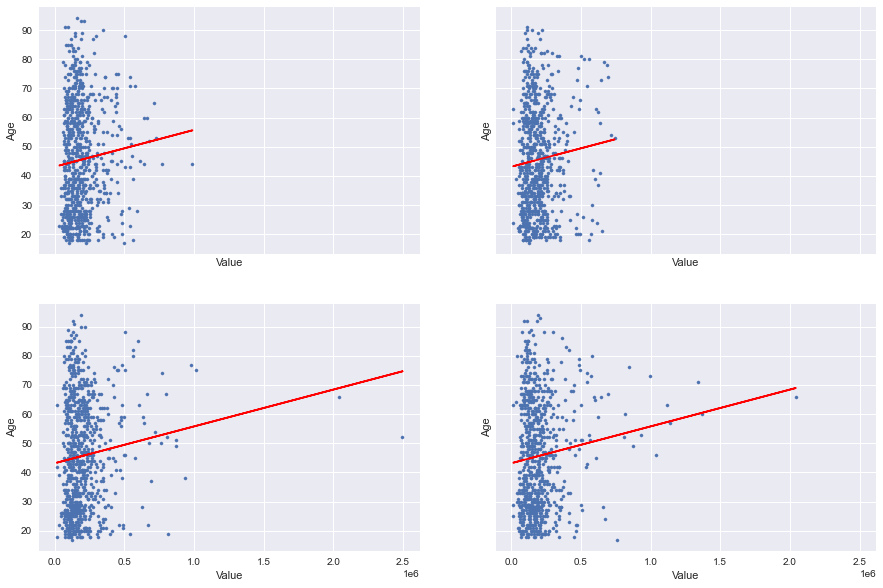

In [35]:
fig, ((ax1, ax2), (ax3, ax4))  = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 10)) 
ax1. scatter(X1, Y1, s=10)
ax1.plot(X1, Y1_pred, color='red')
ax1.set_xlabel("Value")
ax1.set_ylabel("Age")
ax2. scatter(X2, Y2, s=10)
ax2.plot(X2, Y2_pred, color='red')
ax2.set_xlabel("Value")
ax2.set_ylabel("Age")
ax3. scatter(X3, Y3, s=10)
ax3.plot(X3, Y3_pred, color='red')
ax3.set_xlabel("Value")
ax3.set_ylabel("Age")
ax4. scatter(X4, Y4, s=10)
ax4.plot(X4, Y4_pred, color='red')
# ax.scatter(X2, Y2, s=10)
# ax3.scatter(X3, Y3, s=10)
# ax4.scatter(X4, Y4, s=10)
# plt.plot(X, Y_pred, color='red')
ax4.set_xlabel("Value")
ax4.set_ylabel("Age")
plt.show()

In [36]:
dfsample1['AantKind'].fillna(0, inplace=True)

In [37]:
linear_regressor = LinearRegression()
Y = dfsample1['WOZwaarde'].values.reshape(-1, 1)
X = dfsample1['AantKind'].values.reshape(-1, 1)
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

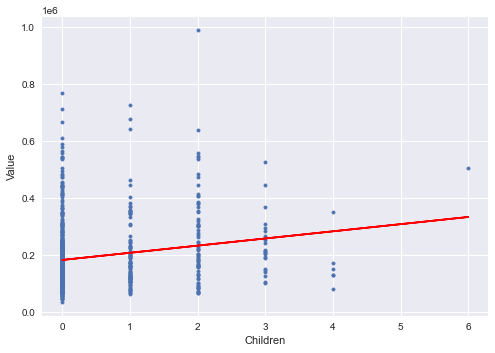

In [38]:
plt.scatter(X, Y, s=12)
plt.plot(X, Y_pred, color='red')
plt.ylabel("Value")
plt.xlabel("Children")
plt.show()

In [39]:
X = df_1[['AantKind', 'LftOP']]
Y = df_1['WOZwaarde']
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
print('Intercept: \n', linear_regressor.intercept_)
print('Coefficients: \n', linear_regressor.coef_)

Intercept: 
 171128.3689398621
Coefficients: 
 [17817.06493417   408.97722374]


In [48]:
df_1_hukogrp=df_1.groupby('huko')
rental=df_1_hukogrp.get_group('Rental')
owner=df_1_hukogrp.get_group('Owner-Occupied')

In [49]:
X = rental[['AantKind', 'LftOP']]
Y = rental['WOZwaarde']
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
print('Intercept: \n', linear_regressor.intercept_)
print('Coefficients: \n', linear_regressor.coef_)

Intercept: 
 177276.93569487333
Coefficients: 
 [ 912.20778561 -311.30198219]


In [50]:
X = owner[['AantKind', 'LftOP']]
Y = owner['WOZwaarde']
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
print('Intercept: \n', linear_regressor.intercept_)
print('Coefficients: \n', linear_regressor.coef_)

Intercept: 
 93613.78265758915
Coefficients: 
 [29159.04445769  2928.28564962]
